# Global Precipitation Measurement (GPM)

A range of GPM products are provided by the ``pansat.products.satellite.gpm`` module. Files within a given time range can be downloaded using the download function.

In [1]:
%load_ext autoreload
%autoreload 2
from datetime import datetime
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)

The variable ``files`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

# XCAL GMI

In [4]:
from pansat.products.satellite.gpm import l1c_gpm_gmi_r
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)
files = l1c_gpm_gmi_r.download(t_0, t_1)

Please enter your pansat user password:
········


In [6]:
import numpy as np
from h5py import File
file = File(files[0])
lats_1 = file["S1"]["Latitude"][:]
lons_1 = file["S1"]["Longitude"][:]
lats_2 = file["S2"]["Latitude"][:]
lons_2 = file["S2"]["Longitude"][:]


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
file["S1/Tc"]

<HDF5 dataset "Tc": shape (2962, 221, 9), type "<f4">

(-50, -10)

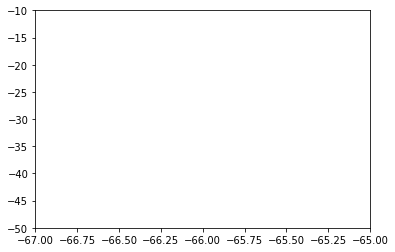

In [47]:
plt.scatter(lats_1[:10, :10], lons_1[:10, :10], s=0.5)
plt.scatter(lats_2[:10, :10], lons_2[:10, :10], s=0.5)
plt.xlim([-67, -65])
plt.ylim([-50, -10])

In [49]:
np.any?

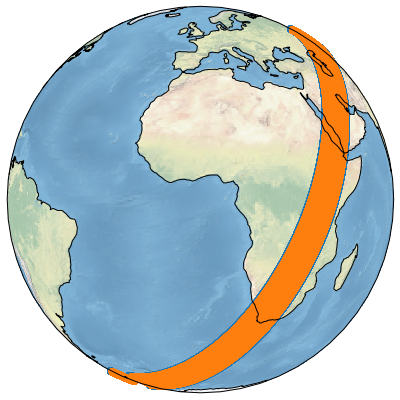

In [25]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective()
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
ax.scatter(lons_1, lats_1, transform=ccrs.PlateCarree())
ax.scatter(lons_2, lats_2, transform=ccrs.PlateCarree())

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

<KeysViewHDF5 ['S1', 'S2']>

In [50]:
file["S1"].keys()

<KeysViewHDF5 ['ScanTime', 'SCstatus', 'Latitude', 'Longitude', 'Quality', 'incidenceAngle', 'sunGlintAngle', 'incidenceAngleIndex', 'Tc']>

## XCAL MHS

In [17]:
from pansat.products.satellite.gpm import l1c_metopb_mhs
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)
files = l1c_metopb_mhs.download(t_0, t_1)

In [18]:
from h5py import File
dataset = l1c_metopb_mhs.open(files[0])
tbs = dataset["tbs"].data
dataset

<xarray.Dataset>
Dimensions:   (channels: 5, pixels: 90, scans: 2280)
Coordinates:
  * scans     (scans) int64 0 1 2 3 4 5 6 ... 2273 2274 2275 2276 2277 2278 2279
  * pixels    (pixels) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * channels  (channels) int64 0 1 2 3 4
Data variables:
    tbs       (scans, pixels, channels) float32 198.96 203.43 ... 245.53 251.83

In [13]:
dataset["latitude"]

NameError: name 'dataset' is not defined

In [11]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective()
ax = plt.subplot(tbs[:, :, 0], projection=proj)
ax.stock_img()
ax.coastlines()
sm = ax.scatter(lons, lats, c=pr, s=10, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
                    
ax = plt.subplot(gs[1])
plt.show()

NameError: name 'tbs' is not defined

<Figure size 576x576 with 0 Axes>

# GPROF GMI

In this example, we plot the surface precipitaiton as retrieved using the GPROF algorithm from observations from the GMI microwave imager on board the GPM Core Observatory.

In [12]:
from pansat.products.satellite.gpm import l2a_gprof_gpm_gmi
files = l2a_gprof_gpm_gmi.download(t_0, t_1)

In [13]:
import numpy as np
import numpy.ma as ma
from h5py import File

file = File(files[0])
lats = file["S1"]["Latitude"][0:2000, :]
lons = file["S1"]["Longitude"][0:2000, :]
lat_c = lats[1000, :].mean()
lon_c = lats[1000, :].mean()
lat_min, lat_max = lats.min(), lats.max()
lon_min, lon_max = lons.min(), lons.max()
pr = file["S1"]["surfacePrecipitation"][0:2000, :]
pr[pr <= 0.0] = np.nan

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """


In [14]:
file["S1"].keys()

<KeysViewHDF5 ['ScanTime', 'SCstatus', 'Latitude', 'Longitude', 'pixelStatus', 'qualityFlag', 'L1CqualityFlag', 'surfaceTypeIndex', 'totalColumnWaterVaporIndex', 'CAPE', 'temp2mIndex', 'sunGlintAngle', 'probabilityOfPrecip', 'spare2', 'surfacePrecipitation', 'frozenPrecipitation', 'convectivePrecipitation', 'rainWaterPath', 'cloudWaterPath', 'iceWaterPath', 'mostLikelyPrecipitation', 'precip1stTertial', 'precip2ndTertial', 'profileTemp2mIndex', 'profileNumber', 'profileScale']>

In [15]:
training_data = GMIDataset("../../training_data_gmi.nc",
                           batch_size=256)

NameError: name 'GMIDataset' is not defined

/home/simon/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


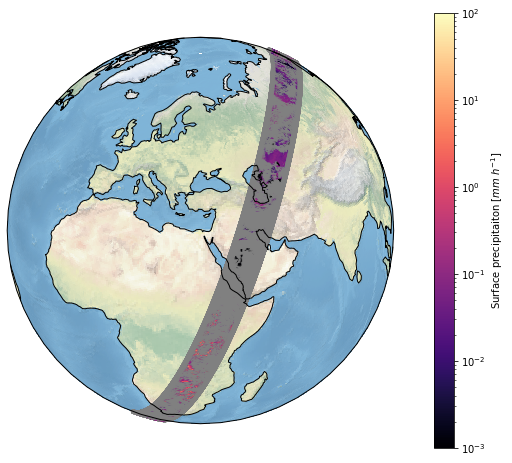

In [3]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_latitude=lat_c,
                                central_longitude=lon_c)
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
sm = ax.scatter(lons, lats, c=pr, s=10, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
                    
ax = plt.subplot(gs[1])
plt.colorbar(sm, cax=ax, fraction=0.4, pad=0.2, label="Surface precipitaiton [$mm\ h^{-1}$]")
plt.show()